<a href="https://colab.research.google.com/github/DimasDwiA/X-RAY-CLASSIFICATION/blob/main/X_RAY_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# X-RAY CLASSIFICATION

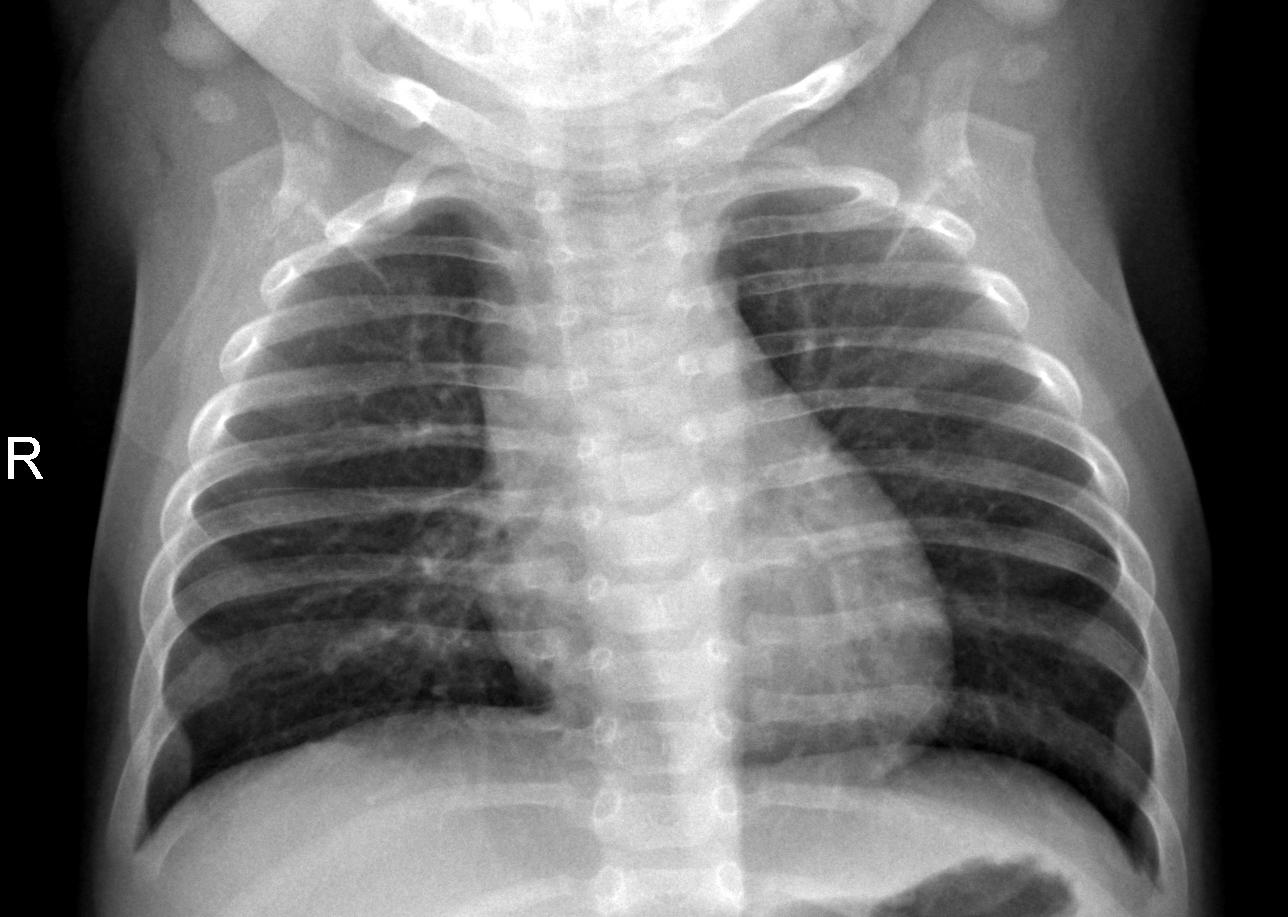

Pada project notebook kali ini saya akan membuat deep learning dengan mengklasifikasikan gambar X-ray, dataset gambar yang dimiliki yaitu terdiri atas 'Bacterial Pneumonia', 'Healthy', 'Viral Pneumonia', dan 'covid-19'. Untuk itu saya akan membuat deep learning menggunakan sistem Transfer Learning dari model Xception menggunakan library dari python yaitu tensorflow. Pada notebook ini saya akan menggunakan transfer learning dengan model Xception agar model yang dibangun dapat menghasilkan tingkat akurasi yang baik dalam memprediksi dari citra X-ray, untuk itu saya memilih metode transfer learning ini untuk memperbaiki model yang dibangun. Oleh karena itu, saya akan menggunakan bobot yang telah saya pelajari dari model Xception asli dan menyempurnakannya.

## EXPLORATORY DATA ANALAYSIS

IMPORTING PYTHON LIBRARY

In [1]:
import zipfile, os
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import matplotlib.image as mpimg
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential 
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from google.colab import files
%matplotlib inline

EXTRACTING IMAGE DATA

In [2]:
local_zip = '/content/drive/MyDrive/Beasiswa Creativa/Radiografi_classification.zip' 
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive')
zip_ref.close()

base_path = '/content/drive/MyDrive/rsp_cv_images'

In [3]:
train_data = image_dataset_from_directory(directory=base_path, image_size=(256,256), label_mode='categorical', batch_size=32, 
                                          seed=45, subset='training', validation_split=0.3)
test_data = image_dataset_from_directory(directory=base_path, image_size=(256,256), label_mode='categorical', batch_size=32, 
                                         seed=45, subset='validation', validation_split=0.3)

Found 532 files belonging to 4 classes.
Using 373 files for training.
Found 532 files belonging to 4 classes.
Using 159 files for validation.


In [4]:
for image_batch, labels_batch in train_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32, 4)


In [5]:
train_data.class_names

['Bacterial Pneumonia', 'Healthy', 'Viral Pneumonia', 'covid-19']

## DATA AUGMENTATION

Data Augmentasi dilakukkan karna data yang kita miliki ini terbatas maka dari itu kita melakukkan data augmentasi agar model yang akan kita bangun nantinya tidak terjadi overfitting dan mendapatkan tingkat akurasi yang baik serta dapat memprediksi gambar dengan baik.

In [6]:
data_augmentation = Sequential([preprocessing.RandomFlip('horizontal'),
                                preprocessing.RandomRotation(0.2),
                                preprocessing.RandomZoom(0.2),
                                preprocessing.RandomHeight(0.2),
                                preprocessing.RandomWidth(0.2)], name='data_augmentation')
rescale= Sequential([preprocessing.Rescaling(1./255.)], name='normalization')

## TRAINING MODEL WITH TANSFER LEARNING (Xception Model)

Dalam kasus ini kita akan menggunakan Transfer Learning dengan menggunakan Xception model karna untuk mempercepat waktu training pada model baru dan meningkatkan akurasi model pada tugas pengenalan gambar. Dengan  menggunakan transfer learning dari Xception model kita dapat memanfaatkan kembali arsitektur yang sudah tersedia dan sudah dilatih dengan dataset yang besar untuk menyelesaikan tugas baru.

In [7]:
base_model = tf.keras.applications.xception.Xception(include_top=False)
base_model.trainable = False
inputs = layers.Input(shape=(256,256,3), name="Input_Layer")
x = data_augmentation(inputs)
x = rescale(x)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name= "Pooling_Layer")(x)
outputs = layers.Dense(4, activation= 'sigmoid', name="Output_Layer")(x)
model1 = keras.Model(inputs, outputs)

83683744/83683744 [==============================] - 0s 0us/step


In [8]:
model1.compile(optimizer=Adam(learning_rate = 0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (InputLayer)    [(None, 256, 256, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 normalization (Sequential)  (None, None, None, 3)     0         
                                                                 
 xception (Functional)       (None, None, None, 2048)  20861480  
                                                                 
 Pooling_Layer (GlobalAverag  (None, 2048)             0         
 ePooling2D)                                                     
                                                                 
 Output_Layer (Dense)        (None, 4)                 8196  

In [10]:
history1 = model1.fit(train_data, epochs=10, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/10


12/12 [==============================] - 216s 17s/step - loss: 1.2468 - accuracy: 0.4504 - val_loss: 1.0647 - val_accuracy: 0.6101
Epoch 2/10
12/12 [==============================] - 181s 15s/step - loss: 0.9487 - accuracy: 0.6649 - val_loss: 0.8637 - val_accuracy: 0.6604
Epoch 3/10
12/12 [==============================] - 195s 17s/step - loss: 0.8136 - accuracy: 0.7319 - val_loss: 0.7855 - val_accuracy: 0.6981
Epoch 4/10
12/12 [==============================] - 196s 17s/step - loss: 0.7241 - accuracy: 0.7721 - val_loss: 0.7234 - val_accuracy: 0.6855
Epoch 5/10
12/12 [==============================] - 211s 18s/step - loss: 0.6671 - accuracy: 0.7775 - val_loss: 0.6889 - val_accuracy: 0.6918
Epoch 6/10
12/12 [==============================] - 221s 18s/step - loss: 0.6340 - accuracy: 0.8070 - val_loss: 0.6507 - val_accuracy: 0.7296
Epoch 7/10
12/12 [==============================] - 204s 17s/step - loss: 0.5624 - accuracy: 0.8204 - val_loss: 0.6378 - val_accuracy: 0.7296
Epoch 8/10
12/12 

MODELING EVALUATION BEFORE FINE TUNE THE XCEPTION MODEL

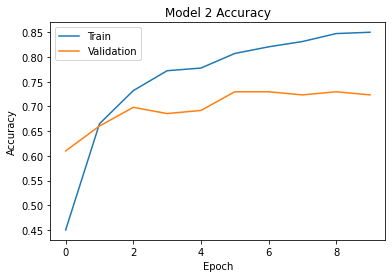

<Figure size 432x288 with 0 Axes>

In [11]:
accuracy = history1.history['accuracy']
val_accuracy = history1.history['val_accuracy']
epoch = range(len(accuracy))

plt.plot(accuracy, label='Training')
plt.plot(val_accuracy, label='Validation')
plt.title('Model 2 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.figure()
plt.show()

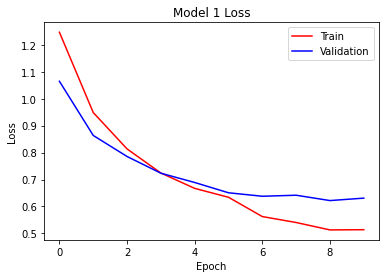

<Figure size 432x288 with 0 Axes>

In [12]:
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epoch = range(len(loss))

plt.plot(loss,'r',label='Loss')
plt.plot(val_loss,'b', label='Loss')
plt.title('Model 1 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.figure()
plt.show()

In [13]:
#Number of layers in our base model, and their trainablity status
for i, layer in enumerate(base_model.layers):
  print(i, layer.name, layer.trainable)

0 input_1 False
1 block1_conv1 False
2 block1_conv1_bn False
3 block1_conv1_act False
4 block1_conv2 False
5 block1_conv2_bn False
6 block1_conv2_act False
7 block2_sepconv1 False
8 block2_sepconv1_bn False
9 block2_sepconv2_act False
10 block2_sepconv2 False
11 block2_sepconv2_bn False
12 conv2d False
13 block2_pool False
14 batch_normalization False
15 add False
16 block3_sepconv1_act False
17 block3_sepconv1 False
18 block3_sepconv1_bn False
19 block3_sepconv2_act False
20 block3_sepconv2 False
21 block3_sepconv2_bn False
22 conv2d_1 False
23 block3_pool False
24 batch_normalization_1 False
25 add_1 False
26 block4_sepconv1_act False
27 block4_sepconv1 False
28 block4_sepconv1_bn False
29 block4_sepconv2_act False
30 block4_sepconv2 False
31 block4_sepconv2_bn False
32 conv2d_2 False
33 block4_pool False
34 batch_normalization_2 False
35 add_2 False
36 block5_sepconv1_act False
37 block5_sepconv1 False
38 block5_sepconv1_bn False
39 block5_sepconv2_act False
40 block5_sepconv2 False

Terdapat 132 layer yang belum bisa dilatih

In [14]:
base_model.trainable = True
#Unfreeze the last half of the layers
for layer in base_model.layers[:-66]:
  layer.trainable= False
#checking layers
for i, layer in enumerate(base_model.layers):
  print(i, layer.name, layer.trainable)

0 input_1 False
1 block1_conv1 False
2 block1_conv1_bn False
3 block1_conv1_act False
4 block1_conv2 False
5 block1_conv2_bn False
6 block1_conv2_act False
7 block2_sepconv1 False
8 block2_sepconv1_bn False
9 block2_sepconv2_act False
10 block2_sepconv2 False
11 block2_sepconv2_bn False
12 conv2d False
13 block2_pool False
14 batch_normalization False
15 add False
16 block3_sepconv1_act False
17 block3_sepconv1 False
18 block3_sepconv1_bn False
19 block3_sepconv2_act False
20 block3_sepconv2 False
21 block3_sepconv2_bn False
22 conv2d_1 False
23 block3_pool False
24 batch_normalization_1 False
25 add_1 False
26 block4_sepconv1_act False
27 block4_sepconv1 False
28 block4_sepconv1_bn False
29 block4_sepconv2_act False
30 block4_sepconv2 False
31 block4_sepconv2_bn False
32 conv2d_2 False
33 block4_pool False
34 batch_normalization_2 False
35 add_2 False
36 block5_sepconv1_act False
37 block5_sepconv1 False
38 block5_sepconv1_bn False
39 block5_sepconv2_act False
40 block5_sepconv2 False

Mengaktifkan separuh layer yang kita punya agar layer tersebut bisa dilatih

## FINE TUNE THE XCEPTION MODEL

  Fine Tune The Xception Model ini dilakukkan guna menyempurnakan model dengan melanjutkan model awal yang telah dijalankan sebelumnya. oleh karna itu, kita akan menggunakan bobot yang telah dipelajari dari model sebelumnya.

  Dengan menambahkan parameter initial_epoch di dalam fungsi fit(), kita akan dapat mulai menjalankan model untuk disempurnakan dari model sebelumnya.

In [15]:
model1.compile(optimizer=Adam(learning_rate = 0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
early_stopping= tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1)
model_checkpoint= tf.keras.callbacks.ModelCheckpoint(filepath='saved_model.h5', save_best_only=True, verbose=1)
history2 = model1.fit(train_data, epochs=25,validation_steps=len(test_data),validation_data=test_data,
                      initial_epoch=history1.epoch[-1], callbacks=[early_stopping, model_checkpoint]) 

Epoch 10/25


12/12 [==============================] - ETA: 0s - loss: 0.5615 - accuracy: 0.7694 
Epoch 10: val_loss improved from inf to 0.65746, saving model to saved_model.h5
12/12 [==============================] - 350s 29s/step - loss: 0.5615 - accuracy: 0.7694 - val_loss: 0.6575 - val_accuracy: 0.7107
Epoch 11/25
12/12 [==============================] - ETA: 0s - loss: 0.4130 - accuracy: 0.8338 
Epoch 11: val_loss did not improve from 0.65746
12/12 [==============================] - 339s 29s/step - loss: 0.4130 - accuracy: 0.8338 - val_loss: 0.7809 - val_accuracy: 0.6981
Epoch 12/25
12/12 [==============================] - ETA: 0s - loss: 0.3723 - accuracy: 0.8472 
Epoch 12: val_loss improved from 0.65746 to 0.61614, saving model to saved_model.h5
12/12 [==============================] - 340s 29s/step - loss: 0.3723 - accuracy: 0.8472 - val_loss: 0.6161 - val_accuracy: 0.7358
Epoch 13/25
12/12 [==============================] - ETA: 0s - loss: 0.2691 - accuracy: 0.8981 
Epoch 13: val_loss impr

In [16]:
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (InputLayer)    [(None, 256, 256, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 normalization (Sequential)  (None, None, None, 3)     0         
                                                                 
 xception (Functional)       (None, None, None, 2048)  20861480  
                                                                 
 Pooling_Layer (GlobalAverag  (None, 2048)             0         
 ePooling2D)                                                     
                                                                 
 Output_Layer (Dense)        (None, 4)                 8196  

MODELING EVALUATION AFTER FINE TUNE THE XCEPTION MODEL

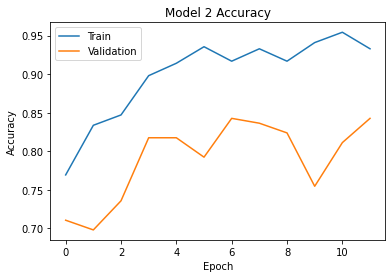

<Figure size 432x288 with 0 Axes>

In [17]:
accuracy = history2.history['accuracy']
val_accuracy = history2.history['val_accuracy']
epoch = range(len(accuracy))

plt.plot(accuracy, label='Training')
plt.plot(val_accuracy, label='Validation')
plt.title('Model 2 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.figure()
plt.show()

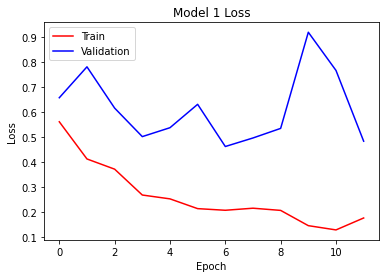

<Figure size 432x288 with 0 Axes>

In [18]:
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epoch = range(len(loss))

plt.plot(loss,'r',label='Loss')
plt.plot(val_loss,'b', label='Loss')
plt.title('Model 1 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.figure()
plt.show()

## OVERALL MODELING EVALUATION

In [19]:
#accuracy & loss
accuracy= history1.history["accuracy"]
loss= history1.history["loss"]
#val_accuracy & val_loss
vali_accuracy= history1.history["val_accuracy"]
vali_loss= history1.history["val_loss"]
#total accuracy & loss 
total_acc= accuracy + history2.history["accuracy"]
total_loss=loss + history2.history["loss"]
#total val_accuracy & val_loss 
total_val_accuracy= vali_accuracy + history2.history["val_accuracy"]
total_val_loss= vali_loss+ history2.history["val_loss"]

(0.0, 16.0)

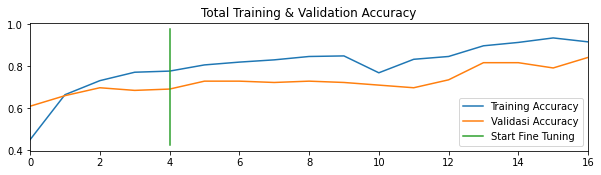

In [20]:
plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
plt.plot(total_acc, label="Training Accuracy" )
plt.plot(total_val_accuracy, label="Validasi Accuracy" )
plt.plot([5-1,5-1], plt.ylim(), label="Start Fine Tuning")
plt.legend(loc="best")
plt.title("Total Training & Validation Accuracy")
plt.xlim(0, history2.epoch[-1] - 4)

(0.0, 16.0)

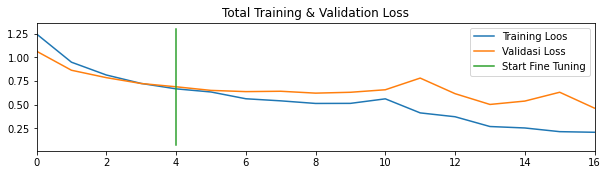

In [21]:
plt.figure(figsize=(10,8))
plt.subplot(3,1,2)
plt.plot(total_loss, label="Training Loos" )
plt.plot(total_val_loss, label="Validasi Loss" )
plt.plot([5-1,5-1], plt.ylim(), label="Start Fine Tuning")
plt.legend(loc="best")
plt.title("Total Training & Validation Loss")
plt.xlim(0, history2.epoch[-1] - 4)

In [22]:
loss , acc= model1.evaluate(train_data)
print(f'Accuracy on training data: {acc} \nLoss on training data: {loss}','\n')

loss, acc= model1.evaluate(test_data)
print(f'Accuracy on test data: {acc} \nLoss on test data: {loss}')

12/12 [==============================] - 117s 9s/step - loss: 0.2467 - accuracy: 0.9008
Accuracy on training data: 0.9008042812347412 
Loss on training data: 0.24666371941566467 

5/5 [==============================] - 49s 10s/step - loss: 0.4840 - accuracy: 0.8428
Accuracy on test data: 0.8427672982215881 
Loss on test data: 0.48397693037986755


## IMAGE PREDICTION

Dari model yang sudah kita bangun sebelumnya dengan menghasilkan tingkat akurasi yang cukup tinggi, kita akan melakukan prediksi gambar pada model yang sudah kita bangun. Untuk kita akan mengambil gambar secara random dari data luar untuk memastikan bahwa model yang  sudah kita buat benar-benar menghasilkan prediksi yang tepat. 

*note: gambar yang akan kita input adalah gambar `Bacterial Pnenumonia`, maka dari itu hasil yang harus didapat adalah prediksi gambar `Bacterial Pnenumonia`

Saving Bacterial (121).jpeg to Bacterial (121).jpeg
1/1 [==============================] - 1s 508ms/step
Bacterial (121).jpeg
Bacterial Pnenumonia


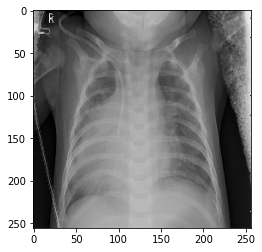

In [26]:
input_image = files.upload()
for fn in input_image.keys():
  path = fn 
  img = image.load_img(path, target_size=(256,256))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model1.predict(images, batch_size=10)
  output_class = np.argmax(classes)
  print(fn)

  if output_class == 0:
    print("Bacterial Pnenumonia")
  elif output_class == 1:
    print("Healthy")
  elif output_class == 2:
    print("Viral Pnenumonia")
  elif output_class == 3:
    print("Covid-19")